<a href="https://colab.research.google.com/github/45sajal/Time_Series_Forecasting/blob/main/Time_forecasting_bitcoin_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-10-10 14:30:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-10-10 14:30:20 (9.58 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],index_col=["Date"]) # tell pandas that 1st column is datetime

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.shape

(2787, 5)

In [5]:
# we only want closing price for each day

In [6]:
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


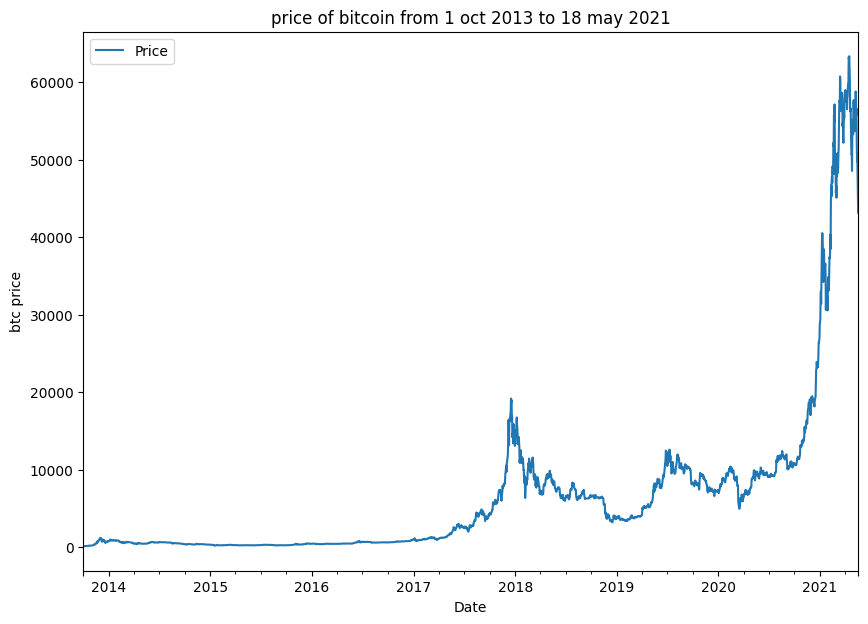

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("btc price")
plt.title("price of bitcoin from 1 oct 2013 to 18 may 2021");

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

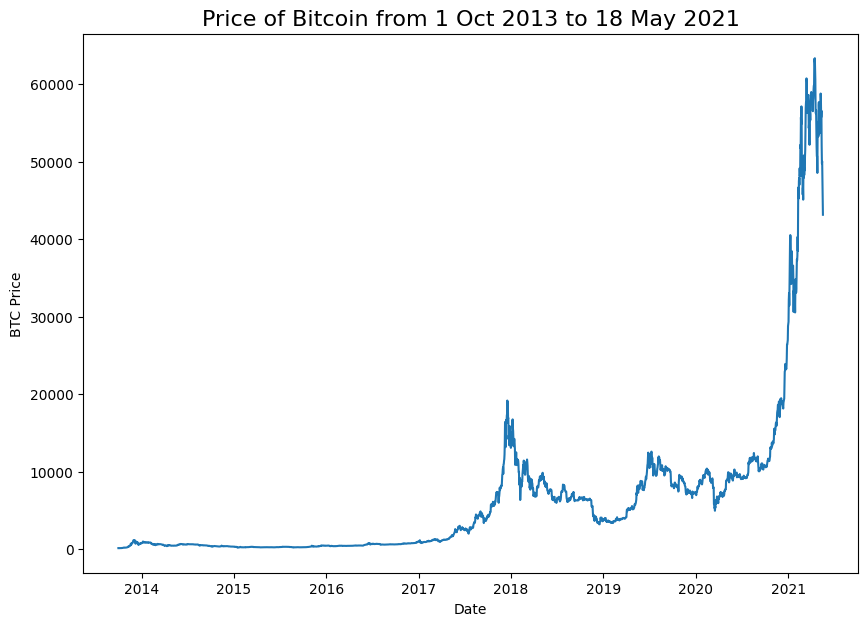

In [9]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [11]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

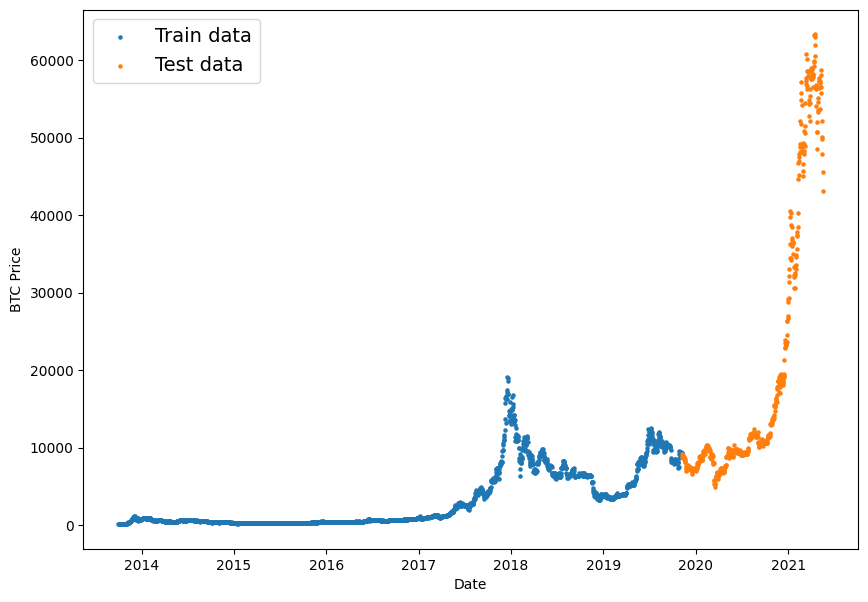

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();


In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

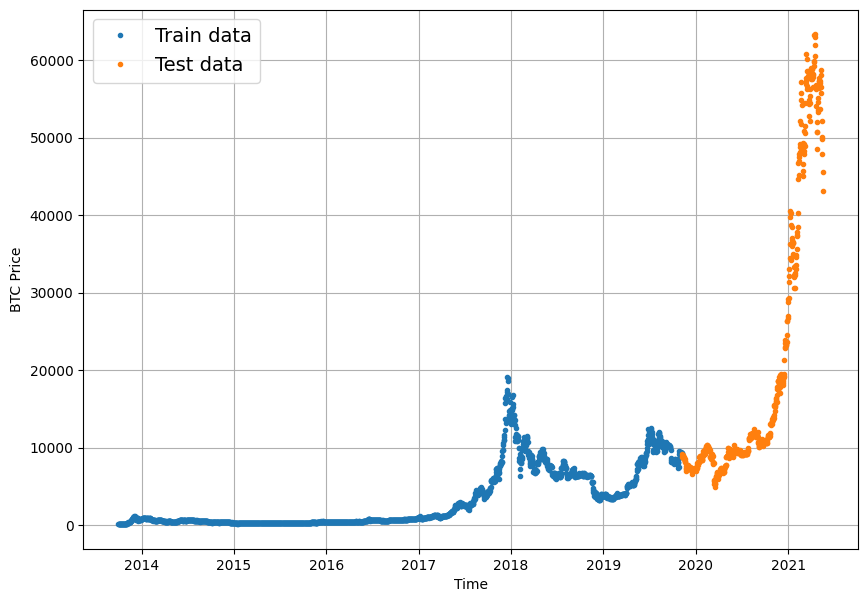

In [15]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")

In [16]:
# some terms
# 1) horizon= no. of timesteps into the future we are going to predict
# 2) window size= number of timesteps we are going to use to predict horizon

In [17]:
# model_0 = naive forecast
# meaning of the above model = prediction at time time t equals to the value at timestamp (t-1) - this is horizon of 1

In [18]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

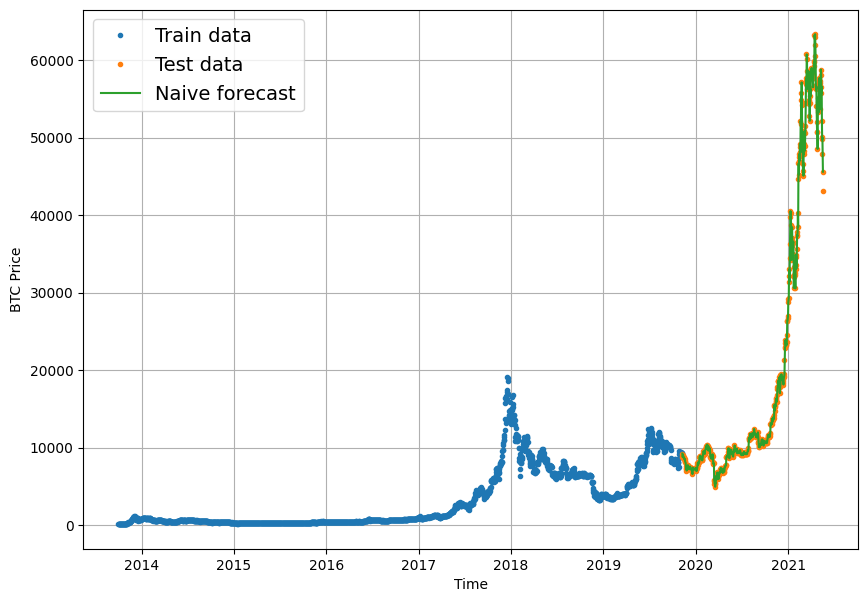

In [19]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

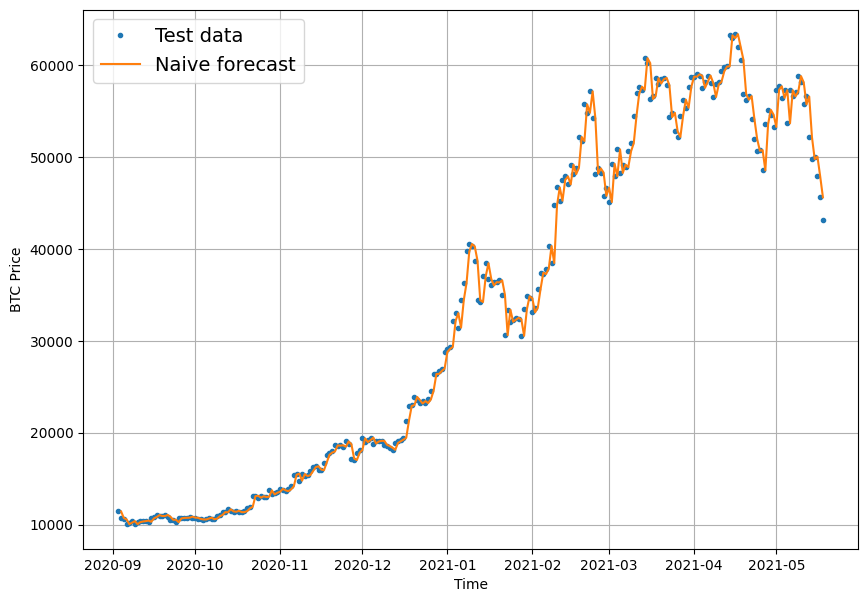

In [20]:

plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [21]:
# evaluating time-series model

In [22]:
# 1) MAE
# 2) MSE
# 3) RMSE
# 4) SYMMETRIC MEAN ABSOLUTE PERCENTAGE ERROR
# 5) MEAN ABSOLUTE SCALED ERROR

In [23]:
import tensorflow as tf

In [24]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [25]:
mean_absolute_scaled_error(y_test[1:],naive_forecast).numpy()

0.9995699939182624

In [26]:
def evaluate_preds(y_true,y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [27]:
naive_results=evaluate_preds(y_test[1:],naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [28]:
# windowing our dataset

# example
# window for one week
# [0,1,2,3,4,5,6] -> [7]
# [1,2,3,4,5,6,7] -> [8]
# [2,3,4,5,6,7,8] -> [9]

In [29]:
print(f"we want to use {btc_price[:7]} to predict this: {btc_price[7]}")

we want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [30]:
HORIZON=1 # predict next 1 day
WINDOW_SIZE=7 # use past 7 days data to predict horizon

In [31]:
def get_labelled_window(x,horizon=HORIZON):
  return x[:,:-horizon],x[:,-horizon:]

In [32]:
test_window,test_label=get_labelled_window(tf.expand_dims(tf.range(8),axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [33]:
import numpy as np
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
  window_indexes=window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
  # print(f"window indexes:\n{window_indexes,window_indexes.shape}")

  windowed_array=x[window_indexes]

  windows,labels=get_labelled_window(windowed_array,horizon)

  return windows,labels

In [34]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [35]:
for i in range(3):
  print(f"window:{full_windows[i]} -> labels {full_labels[i]}")

window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> labels [123.033]
window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> labels [124.049]
window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> labels [125.96116]


In [36]:
for i in range(3):
  print(f"window:{full_windows[i-3]} -> labels {full_labels[i-3]}")

window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> labels [47885.62525472]
window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> labels [45604.61575361]
window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> labels [43144.47129086]


In [37]:
def make_train_test_splits(windows,labels,test_split=0.2):
  split_size=int(len(windows)*(1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [38]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)

In [39]:
# making a modelling checkpoint

In [40]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [41]:
# model 1 (window_size=7,horizon=1)

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

In [43]:
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 64ms/step - loss: 1507.6157 - mae: 1507.6157 - val_loss: 2178.0042 - val_mae: 2178.0042
Epoch 2/100
18/18 [==============================] - 1s 38ms/step - loss: 368.4686 - mae: 368.4686 - val_loss: 1855.9078 - val_mae: 1855.9078
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 216.9079 - mae: 216.9079 - val_loss: 1296.7762 - val_mae: 1296.7762
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 183.0340 - mae: 183.0340 - val_loss: 1029.0618 - val_mae: 1029.0618
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 174.7897 - mae: 174.7897 - val_loss: 972.7062 - val_mae: 972.7062
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 169.5930 - mae: 169.5930 - val_loss: 934.5916 - val_mae: 934.5917
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 164.4988 - mae: 164.4988 - val_loss: 935.5123 - val_mae: 935.5123
Epoch 8/100

In [44]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 651.8266 - mae: 651.8266


[651.8265991210938, 651.8265991210938]

In [45]:
model_1=tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 565.9455 - mae: 565.9455


[565.9454956054688, 565.9454956054688]

In [46]:
def make_preds(model,input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [47]:
model_1_preds=make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8841.555, 8759.266, 9036.628, 8788.476, 8724.107, 8746.822,
        8666.376, 8531.584, 8445.587, 8528.298], dtype=float32)>)

In [48]:
model_1_results=evaluate_preds(tf.squeeze(test_labels),model_1_preds)
model_1_results

{'mae': 565.9455,
 'mse': 1162629.2,
 'rmse': 1078.2529,
 'mape': 2.543477,
 'mase': 0.99420947}

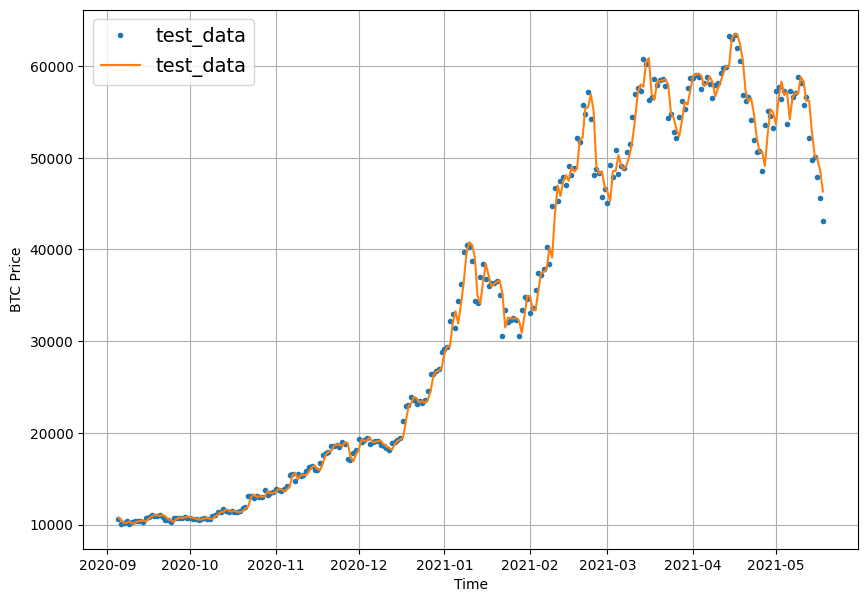

In [49]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,format="-",start=offset,label="test_data")

In [50]:
HORIZON=1
WINDOW_SIZE=30

In [51]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [52]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [53]:
train_windows[:1],train_labels[:1]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]]),
 array([[196.02499]]))

In [54]:
tf.random.set_seed(42)

# Construct model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_2_dense") # give the model a name so we can save it

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_2.fit(x=train_windows, # train windows of 30 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [55]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 699.7909 - mae: 699.7909


[699.7908935546875, 699.7908935546875]

In [56]:
model_2=tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 621.7004 - mae: 621.7004


[621.7003784179688, 621.7003784179688]

In [57]:
model_2_preds=make_preds(model_2,test_windows)

18/18 [==============================] - 0s 2ms/step


In [58]:
model_2_results=evaluate_preds(tf.squeeze(test_labels),model_2_preds)
model_2_results

{'mae': 621.7004,
 'mse': 1313569.8,
 'rmse': 1146.1107,
 'mape': 2.7829838,
 'mase': 1.0867383}

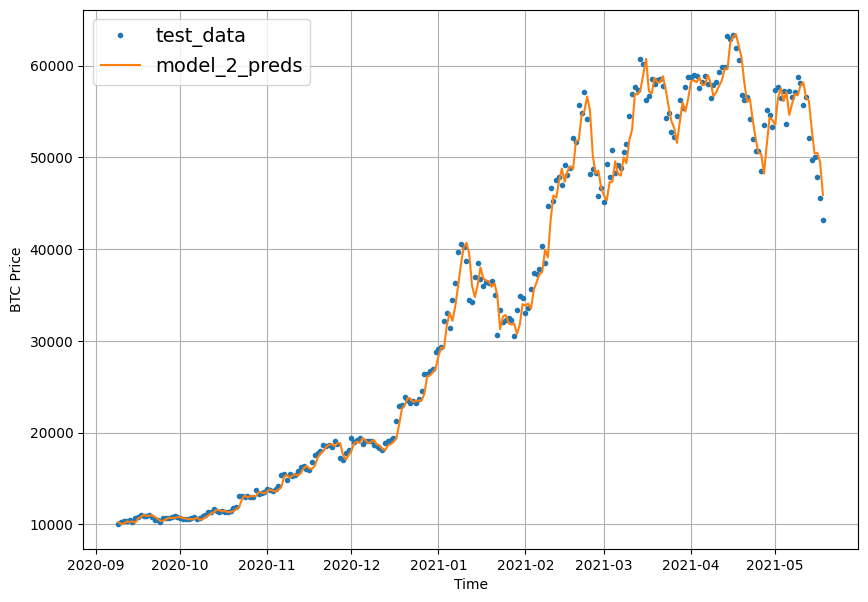

In [59]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,format="-",start=offset,label="model_2_preds")

In [60]:
HORIZON=7
WINDOW_SIZE=30

In [61]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [62]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [63]:
train_windows[:1],train_labels[:1]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]]),
 array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
         248.25333]]))

In [64]:
tf.random.set_seed(42)

# Construct model
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_3_dense") # give the model a name so we can save it

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_3.fit(x=train_windows, # train windows of 30 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [65]:
model_3=tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1258.5465 - mae: 1258.5465


[1258.5465087890625, 1258.5465087890625]

In [66]:
model_3_preds=make_preds(model_3,test_windows)

18/18 [==============================] - 0s 2ms/step


In [67]:
model_3_results=evaluate_preds(tf.squeeze(test_labels),model_3_preds)

In [68]:
def evaluate_preds(y_true,y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [69]:
model_3_results=evaluate_preds(tf.squeeze(test_labels),model_3_preds)
model_3_results

{'mae': 1258.5465,
 'mse': 5448332.0,
 'rmse': 1440.1974,
 'mape': 5.6245794,
 'mase': 2.239513}

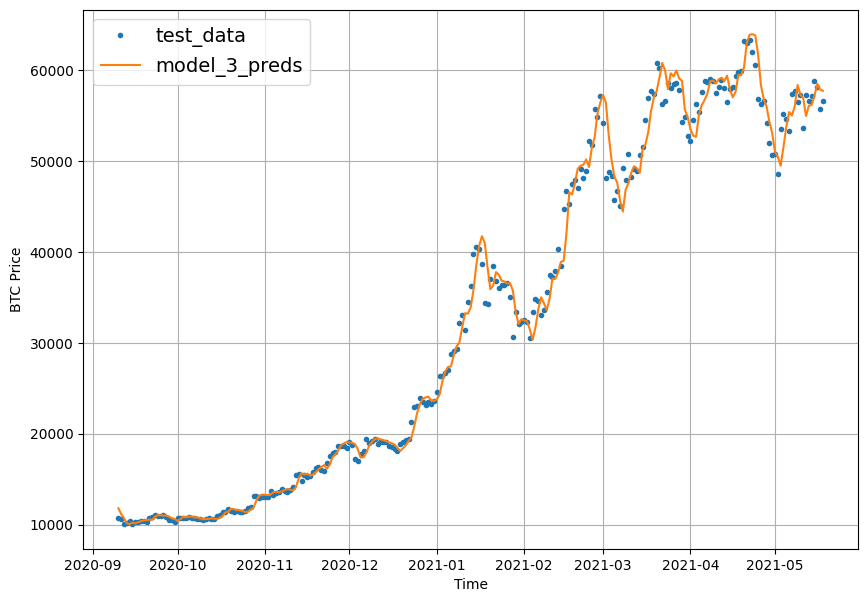

In [70]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),format="-",start=offset,label="model_3_preds")

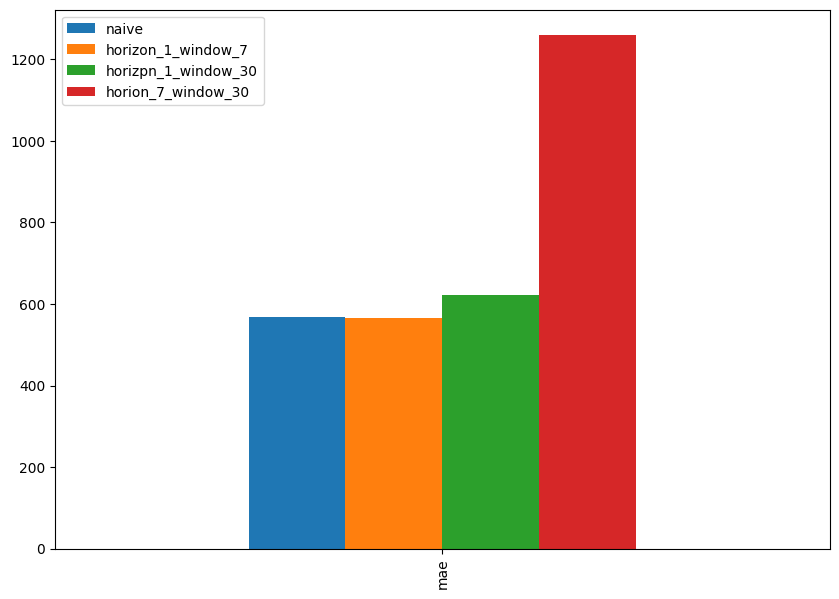

In [71]:
pd.DataFrame({"naive":naive_results["mae"],
              "horizon_1_window_7":model_1_results["mae"],
              "horizpn_1_window_30":model_2_results["mae"],
              "horion_7_window_30":model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar");

In [72]:
# MODEL 4

In [73]:
HORIZON=1
WINDOW_SIZE=7

In [74]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [75]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [76]:
# before we pass our data to conv1d layer we neeed to reshape it

In [77]:
x=tf.constant(train_windows[0])
expand_dims_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [78]:
print(f"original shape{x.shape}\n expanded shape{expand_dims_layer(x).shape}\n value of expanded dims{expand_dims_layer(x)}")

original shape(7,)
 expanded shape(7, 1)
 value of expanded dims[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [79]:
tf.random.set_seed(42)

# Construct model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
  layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu"),
  layers.Dense(HORIZON,activation="linear"),# linear activation is the same as having no activation
], name="model_4_conv1d") # give the model a name so we can save it

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_4.fit(x=train_windows, # train windows of 30 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [80]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 602.1795 - mae: 602.1795


[602.1795043945312, 602.1795043945312]

In [82]:
model_4=tf.keras.models.load_model("model_experiments/model_4_conv1d")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 571.2916 - mae: 571.2916


[571.2916259765625, 571.2916259765625]

In [83]:
model_4_preds=make_preds(model_4,test_windows)
# model_4_preds

18/18 [==============================] - 0s 2ms/step


In [84]:
model_4_results=evaluate_preds(tf.squeeze(test_labels),model_4_preds)
model_4_results

{'mae': 571.2916,
 'mse': 1185137.2,
 'rmse': 1088.64,
 'mape': 2.5579512,
 'mase': 1.0036012}

In [85]:
# model 5

In [86]:
tf.random.set_seed(42)

# Construct model
inputs=layers.Input(shape=(WINDOW_SIZE))
x=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
# x=layers.LSTM(128,return_sequences=True)(x)
x=layers.LSTM(128,activation="relu")(x)
# x=layers.Dense(32,activation="relu")(x)
outputs=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_lstm")


# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_5.fit(x=train_windows, # train windows of 30 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 3s 99ms/step - loss: 2096.2742 - mae: 2096.2742 - val_loss: 8685.3926 - val_mae: 8685.3926
Epoch 2/100
18/18 [==============================] - 1s 85ms/step - loss: 686.9395 - mae: 686.9395 - val_loss: 2152.1138 - val_mae: 2152.1138
Epoch 3/100
18/18 [==============================] - 1s 83ms/step - loss: 254.4345 - mae: 254.4345 - val_loss: 1409.0579 - val_mae: 1409.0579
Epoch 4/100
18/18 [==============================] - 2s 103ms/step - loss: 194.2510 - mae: 194.2510 - val_loss: 1105.2140 - val_mae: 1105.2140
Epoch 5/100
18/18 [==============================] - 2s 110ms/step - loss: 192.7062 - mae: 192.7062 - val_loss: 1057.6410 - val_mae: 1057.6410
Epoch 6/100
18/18 [==============================] - 2s 102ms/step - loss: 178.6529 - mae: 178.6529 - val_loss: 947.3707 - val_mae: 947.3707
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 182.6048 - mae: 182.6048 - val_loss: 1019.1863 - val_mae: 1019.1863
Epoc

In [87]:
model_5=tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 597.4579 - mae: 597.4579


[597.4578857421875, 597.4578857421875]

In [88]:
model_5_preds=make_preds(model_5,test_windows)

18/18 [==============================] - 0s 3ms/step


In [89]:
model_5_results=evaluate_preds(tf.squeeze(test_labels),model_5_preds)
model_5_results

{'mae': 597.4578,
 'mse': 1273702.9,
 'rmse': 1128.5845,
 'mape': 2.7051198,
 'mase': 1.0495679}

In [90]:
#multi varitate dataset

In [91]:
block_reward_1=50
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")

In [92]:
# create date ranges where specific block_reward values should be
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_2_days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_3_days

2421

In [93]:
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [94]:
bitcoin_prices_block.head(5)

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [95]:
bitcoin_prices_block.tail(5)

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

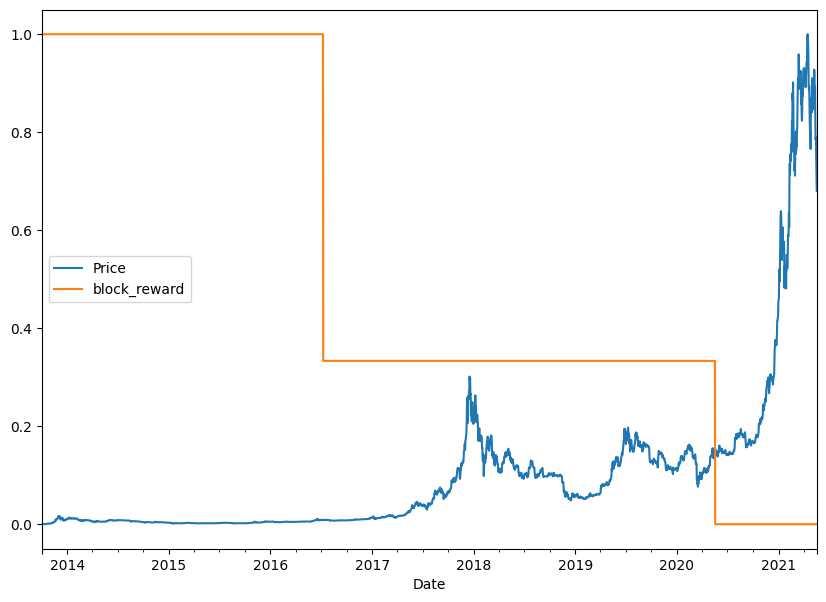

In [96]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),columns=bitcoin_prices_block.columns,index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

In [97]:
# making a windowed dataset with pandas to prepare data for model 6

In [98]:
HORIZON=1
WINDOW_SIZE=7

In [99]:
bitcoin_prices_windowed=bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Pricec+{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Pricec+1,Pricec+2,Pricec+3,Pricec+4,Pricec+5,Pricec+6,Pricec+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [100]:
X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(5)

,block_reward,Pricec+1,Pricec+2,Pricec+3,Pricec+4,Pricec+5,Pricec+6,Pricec+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [101]:
split_size=int(len(X)*0.8)
x_train,y_train=X[:split_size],y[:split_size]
x_test,y_test=X[split_size:],y[split_size:]
len(x_train),len(y_train),len(x_test),len(y_test)

(2224, 2224, 556, 556)

In [102]:
tf.random.set_seed(42)

# Construct model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_6_multivariate") # give the model a name so we can save it

# Compile model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_6.fit(x=x_train, # train windows of 7 timesteps of Bitcoin prices
            y=y_train, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(x_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 2s 41ms/step - loss: 1321.0134 - mae: 1321.0134 - val_loss: 1487.5358 - val_mae: 1487.5358
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 308.1642 - mae: 308.1642 - val_loss: 1232.7980 - val_mae: 1232.7980
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 192.9771 - mae: 192.9771 - val_loss: 980.0501 - val_mae: 980.0501
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 181.0050 - mae: 181.0050 - val_loss: 993.7051 - val_mae: 993.7051
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 163.5084 - mae: 163.5084 - val_loss: 1018.4194 - val_mae: 1018.4194
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 160.8459 - mae: 160.8459 - val_loss: 984.0713 - val_mae: 984.0713
Epoch 7/100
18/18 [==============================] - 1s 51ms/step - loss: 145.4228 - mae: 145.4228 - val_loss: 840.0488 - val_mae: 840.0488
Epoch 8/100
18/

In [103]:
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 571.7253 - mae: 571.7253


[571.7252807617188, 571.7252807617188]

In [104]:
model_6=tf.keras.models.load_model("model_experiments/model_6_multivariate")
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 566.7488 - mae: 566.7488


[566.7488403320312, 566.7488403320312]

In [105]:
model_6_preds=tf.squeeze(model_6.predict(x_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8829.326 , 8775.047 , 9056.29  , 8755.492 , 8724.3955, 8753.405 ,
       8669.066 , 8508.797 , 8459.211 , 8531.072 ], dtype=float32)>

In [106]:
model_6_results=evaluate_preds(y_test,model_6_preds)
model_6_results

{'mae': 566.7488,
 'mse': 1161696.2,
 'rmse': 1077.8202,
 'mape': 2.5471842,
 'mase': 0.9956206}

In [107]:
model_1_results

{'mae': 565.9455,
 'mse': 1162629.2,
 'rmse': 1078.2529,
 'mape': 2.543477,
 'mase': 0.99420947}

In [108]:
# model-7 N-BEATS ALGORITHM

In [109]:
import tensorflow as tf
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,input_size:int,theta_size:int,horizon:int,n_neurons:int,n_layers:int,**kwargs):#kwargs takes care of all the arguments of the parent class eg(trainable,input_shape, name etc)
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers


    # block contains stack of 4 fully connected layers each has relu activation functions
    self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
    # output of a block is a theta layer with linear activatiobn
    self.theta_layer=tf.keras.layers.Dense(theta_size,activation="linear",name="theta")

  def call(self,inputs):
    x=inputs
    for layer in self.hidden:
      x=layer(x)
    theta=self.theta_layer(x)
    # output the backcast and forecast from the theta
    backcast,forecast = theta[:,:self.input_size],theta[:,-self.horizon:]
    return backcast, forecast


In [110]:
# set up Nbeats layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer=NBeatsBlock(WINDOW_SIZE,WINDOW_SIZE+HORIZON,HORIZON,128,4)

In [111]:
# create dummy inputs
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0) # input shape to the model has to reflect dense layer input requirements
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [112]:
backcast,forecast =dummy_nbeats_block_layer(dummy_inputs)
# these are activations output of the theta layer (they'll be random coz of no training of the models)
print(f"backcast: {tf.squeeze(backcast.numpy())} /n forecast: {tf.squeeze(forecast.numpy())}")

backcast: [-0.5465191   0.38325828  0.28633964 -0.24326497 -0.4563964   0.239989
  0.5506562 ] /n forecast: -0.06282973289489746


In [113]:
# preparing data for N-BEATS

In [114]:
HORIZON=1
WINDOW_SIZE=7

In [115]:
bitcoin_prices_nbeats=bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [116]:
# make features and labels

In [117]:
X=bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]

split_size=int(len(X)*0.8)
x_train,y_train=X[:split_size],y[:split_size]
x_test,y_test=X[split_size:],y[split_size:]
len(x_train),len(y_train),len(x_test),len(y_test)

(2224, 2224, 556, 556)

In [118]:
import tensorflow as tf

train_features_dataset=tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset=tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

train_dataset=tf.data.Dataset.zip(train_features_dataset,train_labels_dataset)
test_dataset=tf.data.Dataset.zip(test_features_dataset,test_labels_dataset)

BATCH_SIZE=1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [119]:
# hyper-paramters for nbeats

In [120]:
# values from n-beats paper
N_EPOCHS=500
N_NEURONS=512
N_LAYERS=4
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE=INPUT_SIZE + HORIZON # HOW MUCH WE WANT INTO INPUT + HOW MUCH WE WANT INTO OUTPUT
INPUT_SIZE,THETA_SIZE

(7, 8)

In [121]:
# getting ready for residual connections, we need two layers for residual connections(subtract and add)

In [122]:
tensor_1=tf.range(10)+10
tensor_2=tf.range(10)

subtracted=tf.keras.layers.subtract([tensor_1,tensor_2])
added=tf.keras.layers.add([tensor_1,tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


Building, compiling and fitting the N-BEATS algorithm
We'll do so by going through the following:

1) Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
2)Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
3)Make the initial backcast and forecasts for the model with the layer created in (1)
4)Use a for loop to create stacks of block layers
5)Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6)Create the double residual stacking using subtract and add layers
7)Put the model inputs and outputs together using tf.keras.Model()
8)Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
9)Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
9.1) tf.keras.callbacks.EarlyStopping() - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
9.2)tf.keras.callbacks.ReduceLROnPlateau() - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)

In [123]:
# %% time
tf.random.set_seed(42)
#1 setup and instance of NBeatsBlock
nbeats_block_layer=NBeatsBlock(INPUT_SIZE,THETA_SIZE,HORIZON,N_NEURONS,N_LAYERS,name="InitialBlock")

#2 create input to stack
stack_input=tf.keras.layers.Input(shape=(INPUT_SIZE),name="stack_input")

#3 create initail backcast and forecast input
residuals,forecast=nbeats_block_layer(stack_input)

#4 create stacks of block layers
for i,_ in enumerate(range(N_STACKS-1)): # first stack is already created in 3
  #5 use the nbeats_block to calculate backcast and forecast
  backcast,block_forecast=NBeatsBlock(INPUT_SIZE,THETA_SIZE,HORIZON,N_NEURONS,N_LAYERS,name=f"NBeatsBlock_{i}")(residuals)

  #6 create the double residdual stacking
  residuals=tf.keras.layers.subtract([residuals,backcast],name=f"subtract_{i}")
  forecast=tf.keras.layers.add([forecast,block_forecast],name=f"add_{i}")

#7 put the stack model together
model_7=tf.keras.Model(inputs=stack_input,outputs=forecast,name="model_7_NBEATS")

#8 compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#9 fit the model with early stopping and reduceLRonPlateau callbacks
model_7.fit(train_dataset,epochs=N_EPOCHS,verbose=0,validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=200,restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=100,verbose=1)])

In [124]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 588.5231 - mae: 588.5231


[588.5231323242188, 588.5231323242188]

In [125]:
model_7_preds=make_preds(model_7,test_dataset)

1/1 [==============================] - 1s 1s/step


In [126]:
model_7_results=evaluate_preds(y_test,model_7_preds)
model_7_results

{'mae': 588.52313,
 'mse': 1228059.1,
 'rmse': 1108.1783,
 'mape': 2.6688998,
 'mase': 1.0338721}

In [127]:
## plotting the n-beats model

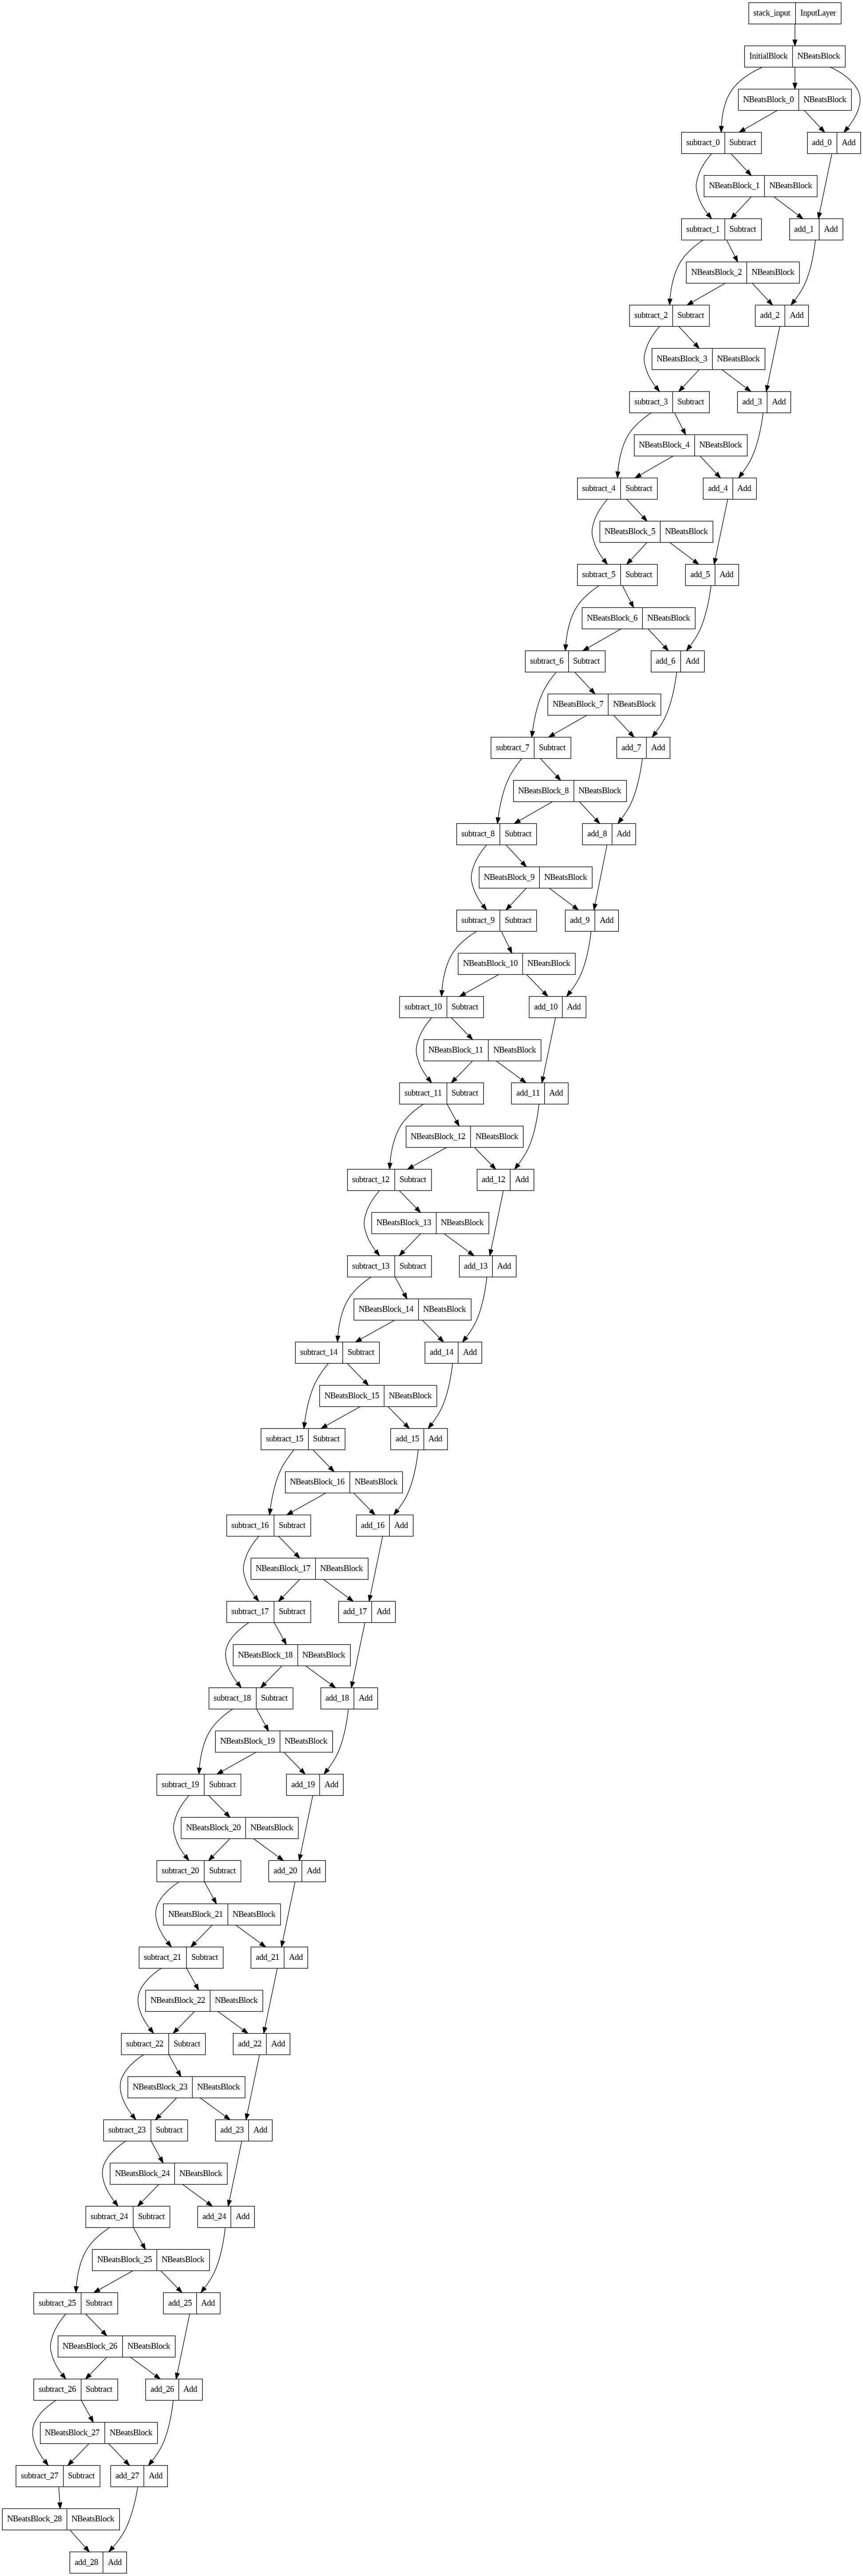

In [128]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [129]:
# model 8 -> creating an emsemble model (stacking different models together)

In [130]:
HORIZON=1
WINDOW_SIZE=7

In [131]:
def get_ensemble_model(horizon=HORIZON,train_data=train_dataset,test_data=test_dataset,num_iter=10,num_epochs=100,loss_fns=["mae","mse","mape"]):
  ensemble_models=[]
  for i in range(num_iter):
    # build and fit the new model with different loss function
    for loss_function in loss_fns:
      print(f"optimizing model by reducing:{loss_function} for {num_epochs} epochs,model_number:{i}")

      # construct the simple model
      model=tf.keras.Sequential([
          tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          tf.keras.layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae","mse"])
      model.fit(train_data,epochs=num_epochs,verbose=0,validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=200,restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=100,verbose=1)])

      ensemble_models.append(model)
  return ensemble_models

In [132]:
%%time
ensemble_models=get_ensemble_model(num_iter=5,num_epochs=1000)

optimizing model by reducing:mae for 1000 epochs,model_number:0

Epoch 983: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model by reducing:mse for 1000 epochs,model_number:0

Epoch 340: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 440: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing:mape for 1000 epochs,model_number:0

Epoch 638: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 760: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 860: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing model by reducing:mae for 1000 epochs,model_number:1
optimizing model by reducing:mse for 1000 epochs,model_number:1

Epoch 321: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 421: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing:mape for 1

In [133]:
len(ensemble_models)

15

In [134]:
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [135]:
# %%time
ensemble_preds=make_ensemble_preds(ensemble_models,test_dataset)
ensemble_preds

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 60ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8829.89 ,  8745.67 ,  9095.759, ..., 49602.277, 48496.59 ,
        45967.41 ],
       [ 8816.885,  8793.839,  9029.902, ..., 49515.637, 47997.977,
        45675.84 ],
       [ 8765.551,  8768.954,  9070.371, ..., 50007.742, 48502.953,
        46403.75 ],
       ...,
       [ 8810.099,  8764.253,  9123.234, ..., 49801.285, 47822.12 ,
        47078.68 ],
       [ 8748.032,  8774.747,  9055.948, ..., 49704.27 , 48919.484,
        45957.184],
       [ 8808.034,  8784.674,  9045.321, ..., 49255.137, 48792.098,
        46113.25 ]], dtype=float32)>

In [136]:
ensemble_mean=tf.reduce_mean(ensemble_preds,axis=0)

In [137]:
import numpy as np
ensemble_median=np.median(ensemble_preds,axis=0)

In [138]:
ensemble_results=evaluate_preds(y_test,ensemble_mean)
ensemble_results

{'mae': 567.78754,
 'mse': 1150027.2,
 'rmse': 1072.3932,
 'mape': 2.562129,
 'mase': 0.99744546}

In [139]:
ensemble_results_median=evaluate_preds(y_test,ensemble_median)
ensemble_results_median

{'mae': 569.38525,
 'mse': 1150742.0,
 'rmse': 1072.7264,
 'mape': 2.5647159,
 'mase': 1.0002521}

In [140]:
# now instaed of predicting a single value, lets predict the range of values ex- instead of 50k lets predict 48k-52k

In [141]:
from tensorflow.python.ops.gen_array_ops import upper_bound
# find upper and lower bounds to ensemble predictions
def get_upper_lower(preds):

  # measure the std of the predictions
  std=tf.math.reduce_std(preds,axis=0)

  # multiply the std by 1.96
  interval=1.96*std

  #get the prediction interval upper and lower bounds
  preds_mean=tf.reduce_mean(preds,axis=0)
  lower,upper=preds_mean- interval,preds_mean+interval

  return lower,upper

In [142]:
lower,upper=get_upper_lower(ensemble_preds)

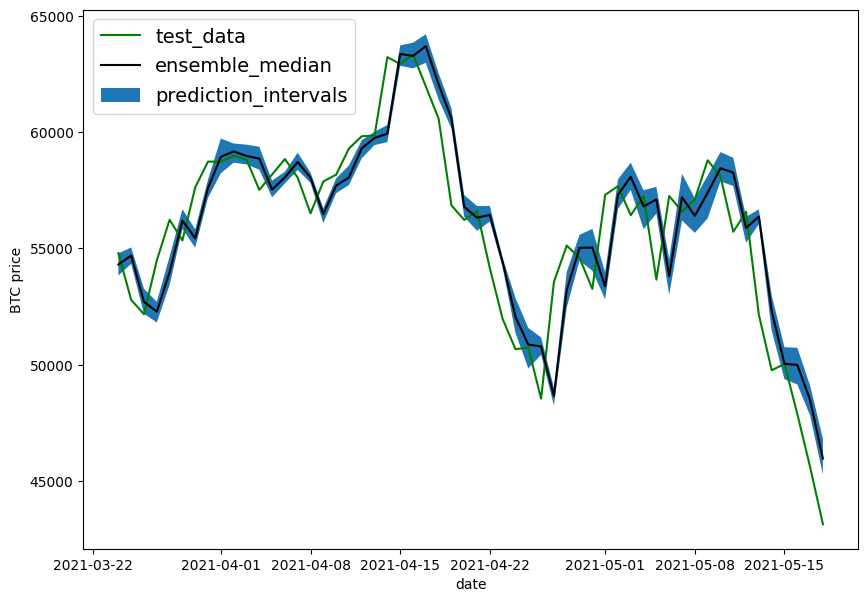

In [143]:
ensemble_preds=np.median(ensemble_preds,axis=0)
# plot the median
offset=500
plt.figure(figsize=(10,7))
plt.plot(x_test.index[offset:],y_test[offset:],"g",label="test_data")
plt.plot(x_test.index[offset:],ensemble_median[offset:],"k-",label="ensemble_median")
plt.xlabel("date")
plt.ylabel("BTC price")
plt.fill_between(x_test.index[offset:],(lower)[offset:],(upper)[offset:],label="prediction_intervals")
plt.legend(loc="upper left",fontsize=14)

In [144]:
# uncertanity in ML/DL
# 1) ALeatoric uncertaninty -> this type of uncertanity cannot be reduced, also known as data uncertanity or subway uncertanity
# 2) epistemic uncertanity -> this can be reduced, also known as model uncertanity or coconut uncertanity

In [145]:
# model 9

In [146]:
HORIZON=1
WINDOW_SIZE=7

In [147]:
x_all=bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()
y_all=bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [148]:
len(x_all),len(y_all)

(2780, 2780)

In [149]:
import tensorflow as tf
features_dataset_all=tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all=tf.data.Dataset.from_tensor_slices(y_all)

dataset_all=tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))
BATCH_SIZE=1024
dataset_all=dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [150]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_9_all_dataset") # give the model a name so we can save it

# Compile model
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_9.fit(dataset_all,
            verbose=0,
            epochs=100)

In [151]:
INTO_FUTURE=14

In [152]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast


In [153]:
# future_forecast=make_future_forecast(y_all,model_9,INTO_FUTURE,WINDOW_SIZE)

# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)


1/1 [==============================] - 0s 51ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55433.421875

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55433.421875  ] -> Prediction: 51890.6171875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55433.421875   51890.6171875 ] -> Prediction: 49127.1875

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55433.421875   51890.6171875  49127.1875    ] -> Prediction: 48472.203125

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55433.421875
 51890.6171875  49127.1875     48472.203125  ] ->

In [154]:
# def get_future_dates(start_date,into_future,offset=1):
#   start_date=start_date + np.timedelta64(offset,"D")
#   end_date=start_date + np.timedelta64(into_future,"D")
#   return np.arange(start_date,end_date,dtype="datetime64[D]")



def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [155]:
# last_timestep=bitcoin_prices.index[-1]

# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [156]:
# next_time_steps=get_future_dates(last_timestep,into_future=INTO_FUTURE,)
# next_time_steps

# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [157]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55433.42 , 51890.617, 49127.188, 48472.203, 46305.203,
        44912.19 , 47049.86 , 54729.684, 51047.953, 47943.42 , 46885.977,
        45236.47 , 45745.36 , 49683.16 ], dtype=float32))

In [158]:
next_time_steps.shape,future_forecast.shape

((15,), (15,))

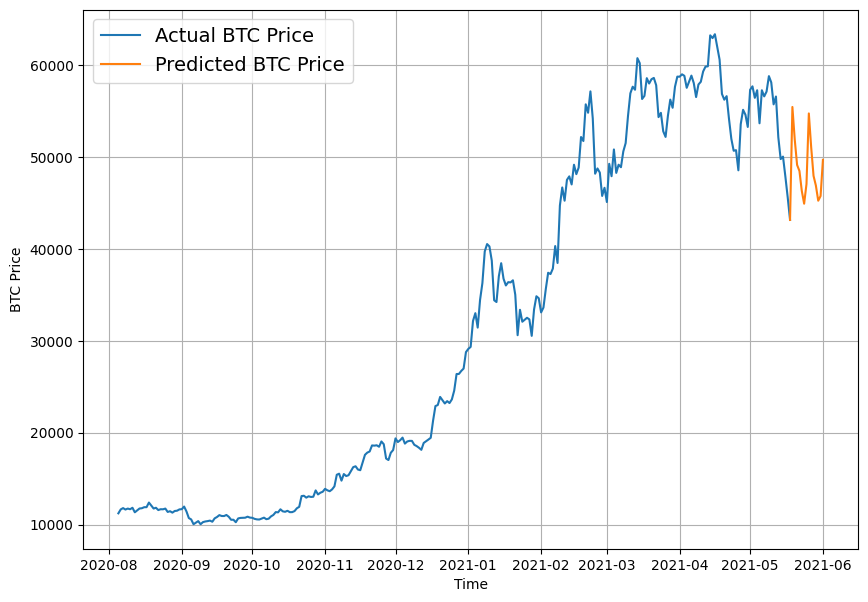

In [159]:

# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [160]:
btc_price_turkey=btc_price.copy()
btc_price_turkey[-1]=btc_price_turkey[-1]/100

In [161]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [162]:
btc_timesteps_turkey=np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

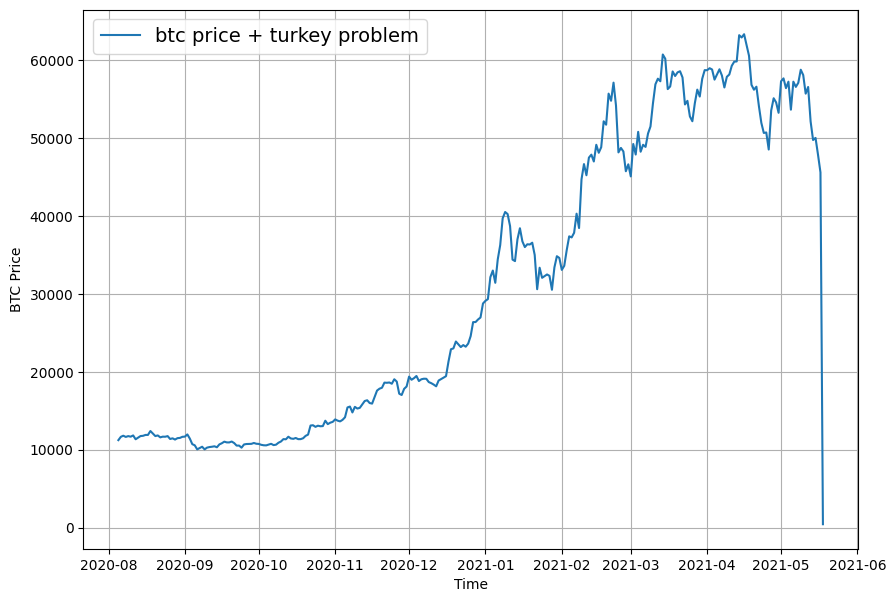

In [163]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,values=btc_price_turkey,format="-",label="btc price + turkey problem",start=2500)


In [164]:
HORIZON=1
WINDOW_SIZE=7

In [165]:
full_windows,full_labels=make_windows(np.array(btc_price_turkey),window_size=WINDOW_SIZE)
x_train,x_test,y_train,y_test=make_train_test_splits(full_windows,full_labels)
len(x_train), len(x_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [166]:
tf.random.set_seed(42)

# Construct model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_10_turkey_model") # give the model a name so we can save it

# Compile model
model_10.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_10.fit(x=x_train, # train windows of 7 timesteps of Bitcoin prices
            y=y_train, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(x_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_10.name)])

Epoch 1/100
18/18 [==============================] - 2s 64ms/step - loss: 1192.8046 - mae: 1192.8046 - val_loss: 2897.8608 - val_mae: 2897.8608
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 297.7267 - mae: 297.7267 - val_loss: 997.9773 - val_mae: 997.9773
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 160.5658 - mae: 160.5658 - val_loss: 859.6323 - val_mae: 859.6323
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 145.2315 - mae: 145.2315 - val_loss: 842.4827 - val_mae: 842.4827
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 139.5615 - mae: 139.5615 - val_loss: 836.2266 - val_mae: 836.2266
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 138.4986 - mae: 138.4986 - val_loss: 848.1967 - val_mae: 848.1967
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 137.4382 - mae: 137.4382 - val_loss: 819.1265 - val_mae: 819.1265
Epoch 8/100
18/18

In [167]:
model_10.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 688.4170 - mae: 688.4170


[688.4169921875, 688.4169921875]

In [168]:
turkey_model=tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 641.9375 - mae: 641.9375


[641.9375, 641.9375]

In [169]:
turkey_preds=make_preds(turkey_model,x_test)

18/18 [==============================] - 0s 2ms/step


In [170]:
turkey_results=evaluate_preds(y_test,turkey_preds)
turkey_results

{'mae': 17136.742,
 'mse': 614923200.0,
 'rmse': 23727.486,
 'mape': 121.45678,
 'mase': 26.519161}

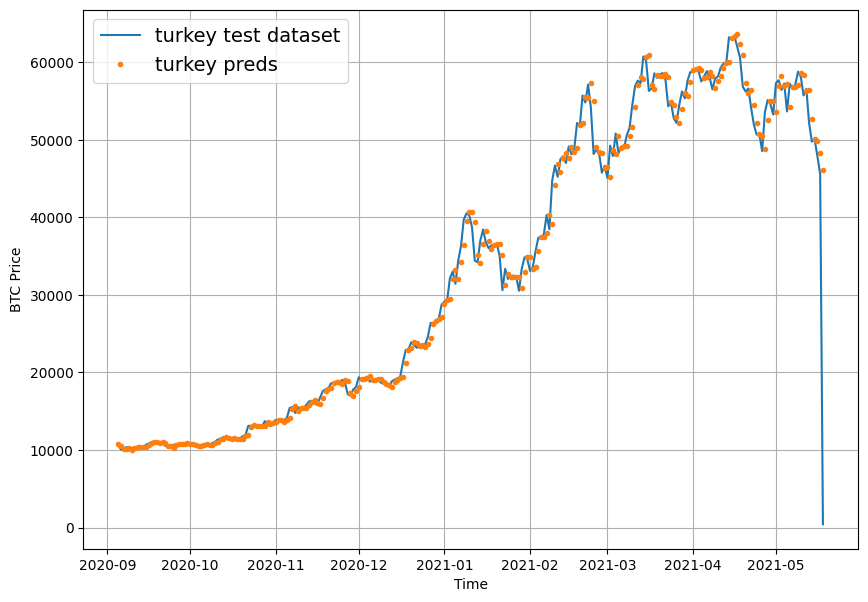

In [171]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(btc_timesteps_turkey[-len(x_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="turkey test dataset",start=offset)

plot_time_series(btc_timesteps_turkey[-len(x_test):],
                 values=turkey_preds,
                 label="turkey preds",start=offset)

In [172]:
# compare models

In [173]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,565.945496,1.162629e+06,1078.252930,2.543477,0.994209
model_2_dense_w30_h1,621.700378,1.313570e+06,1146.110718,2.782984,1.086738
model_3_dense_w30_h7,1258.546509,5.448332e+06,1440.197388,5.624579,2.239513
model_4_CONV1D,571.291626,1.185137e+06,1088.640015,2.557951,1.003601
model_5_LSTM,597.457825,1.273703e+06,1128.584473,2.705120,1.049568
model_6_multivariate,566.748779,1.161696e+06,1077.820190,2.547184,0.995621
model_8_NBEATs,588.523132,1.228059e+06,1108.178345,2.668900,1.033872
model_9_ensemble,567.787537,1.150027e+06,1072.393188,2.562129,0.997445
model_10_turkey,17136.742188,6.149232e+08,23727.486328,121.456779,26.519161


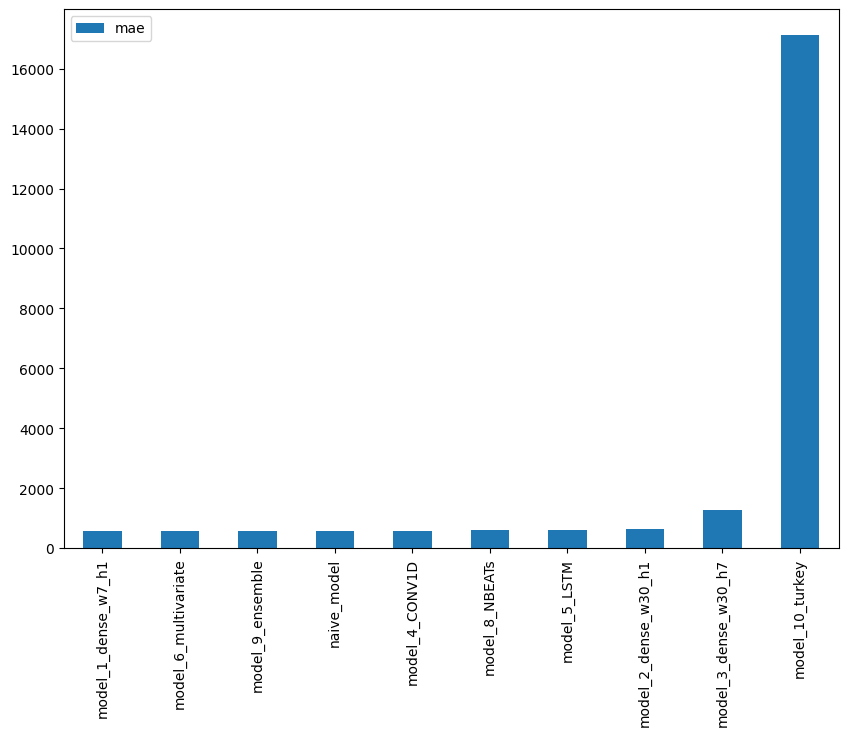

In [174]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");